In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from rv import radial_velocity, rv_error, remove_nans
import os

In [15]:
path_lines = str("lines") + ".txt"

np.loadtxt(path_lines)

array([6546.238, 6569.214])

In [3]:
hdul = fits.open('00973508_HRF_OBJ_ext_CosmicsRemoved_log_merged_cf.fits')

In [7]:
flux = hdul[0].data.T
L0 = hdul[0].header['CRVAL1']
step = hdul[0].header['CDELT1']

logL = np.linspace(L0, L0+len(flux)*step, len(flux))
lam = np.exp(logL)
lam

array([3763.71717476, 3763.73674816, 3763.75632166, ..., 9006.37130577,
       9006.41814386, 9006.46498218])

In [ ]:
flux_removed, wavelength_removed = remove_nans(flux)
wavelength_good = lam[wavelength_removed]
data = np.array([wavelength_good, flux_removed])

np.savetxt(f'tyc2250.asc', data.T, delimiter='\t')

In [6]:
v0 = 40
lines = [6546.238, 6569.214]
cutoff = 100

radial_velocity(lines, flux, lam, v0, cutoff), rv_error(lines, flux, lam, v0, cutoff)

(([16.915994220129107, 17.366996998112903], 17.141495609121005),
 0.31890712264631277)

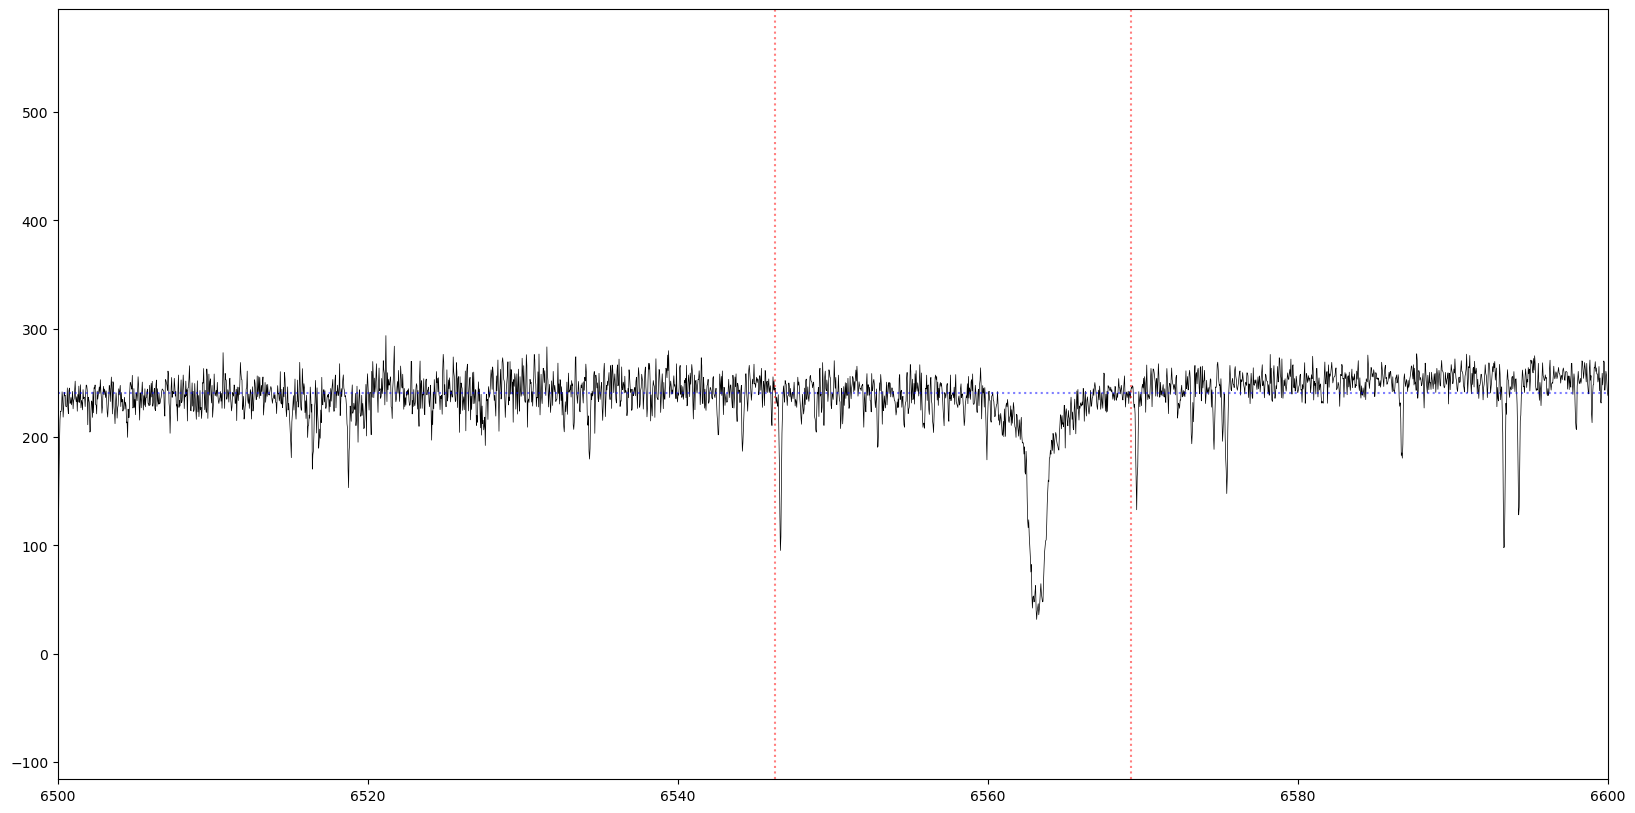

In [114]:
fig, ax  = plt.subplots(1, 1, figsize=(20, 10))

ax.plot(lam, flux, color='black', linewidth=0.5)

ax.set_xlim(6500, 6600)

#ax.set_xlim(lam_l, lam_u)

lines = [6569.214, 6546.238, 6533.928, 6518.366]

lines = [6546.238, 6569.214]

for line in lines:
    ax.axvline(x = line, color = 'red', alpha = 0.5, ls=':')

plt.show()

In [126]:
def merge(binned):
    merged = []
    for i in range(len(binned)):
        for j in range(len(binned[i])):
            merged.append(binned[i][j])
    return merged


def normalize(flux):
    binned = bin_data(flux)
    for i in range(len(binned)):
        binned[i] = binned[i] / np.amax(binned[i])
    return merge(binned)

def bin_data(flux):
    indices = np.linspace(0, len(flux), 50)
    A = np.zeros(len(indices)-2, dtype = object)
    for i in range(0, len(indices[1:])-1):
        A[i] = np.array(flux[int(np.floor(indices[i])):int(np.ceil(indices[i+1]))])
    return A